In [131]:
# EDA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Load the dataset
housing_df = pd.read_csv('./data/kc_house_data_classification.csv')


In [133]:
# Basic info
housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [135]:
# Summary statistics
print(housing_df.describe())


           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.390691   
std        0.086517      0.766318      0.650743    

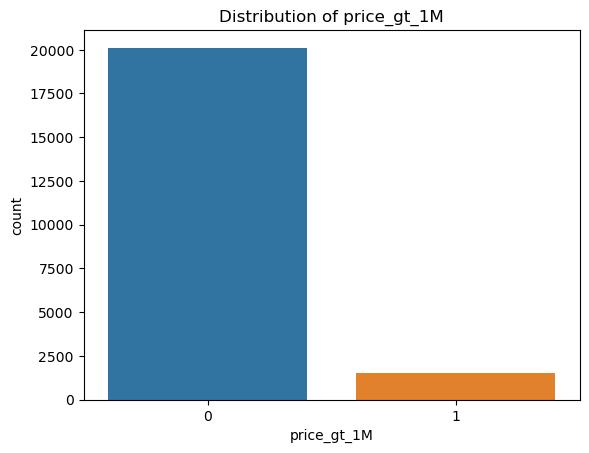

In [137]:
# Distribution of the target variable
sns.countplot(x='price_gt_1M', data=housing_df)
plt.title('Distribution of price_gt_1M')
plt.show()

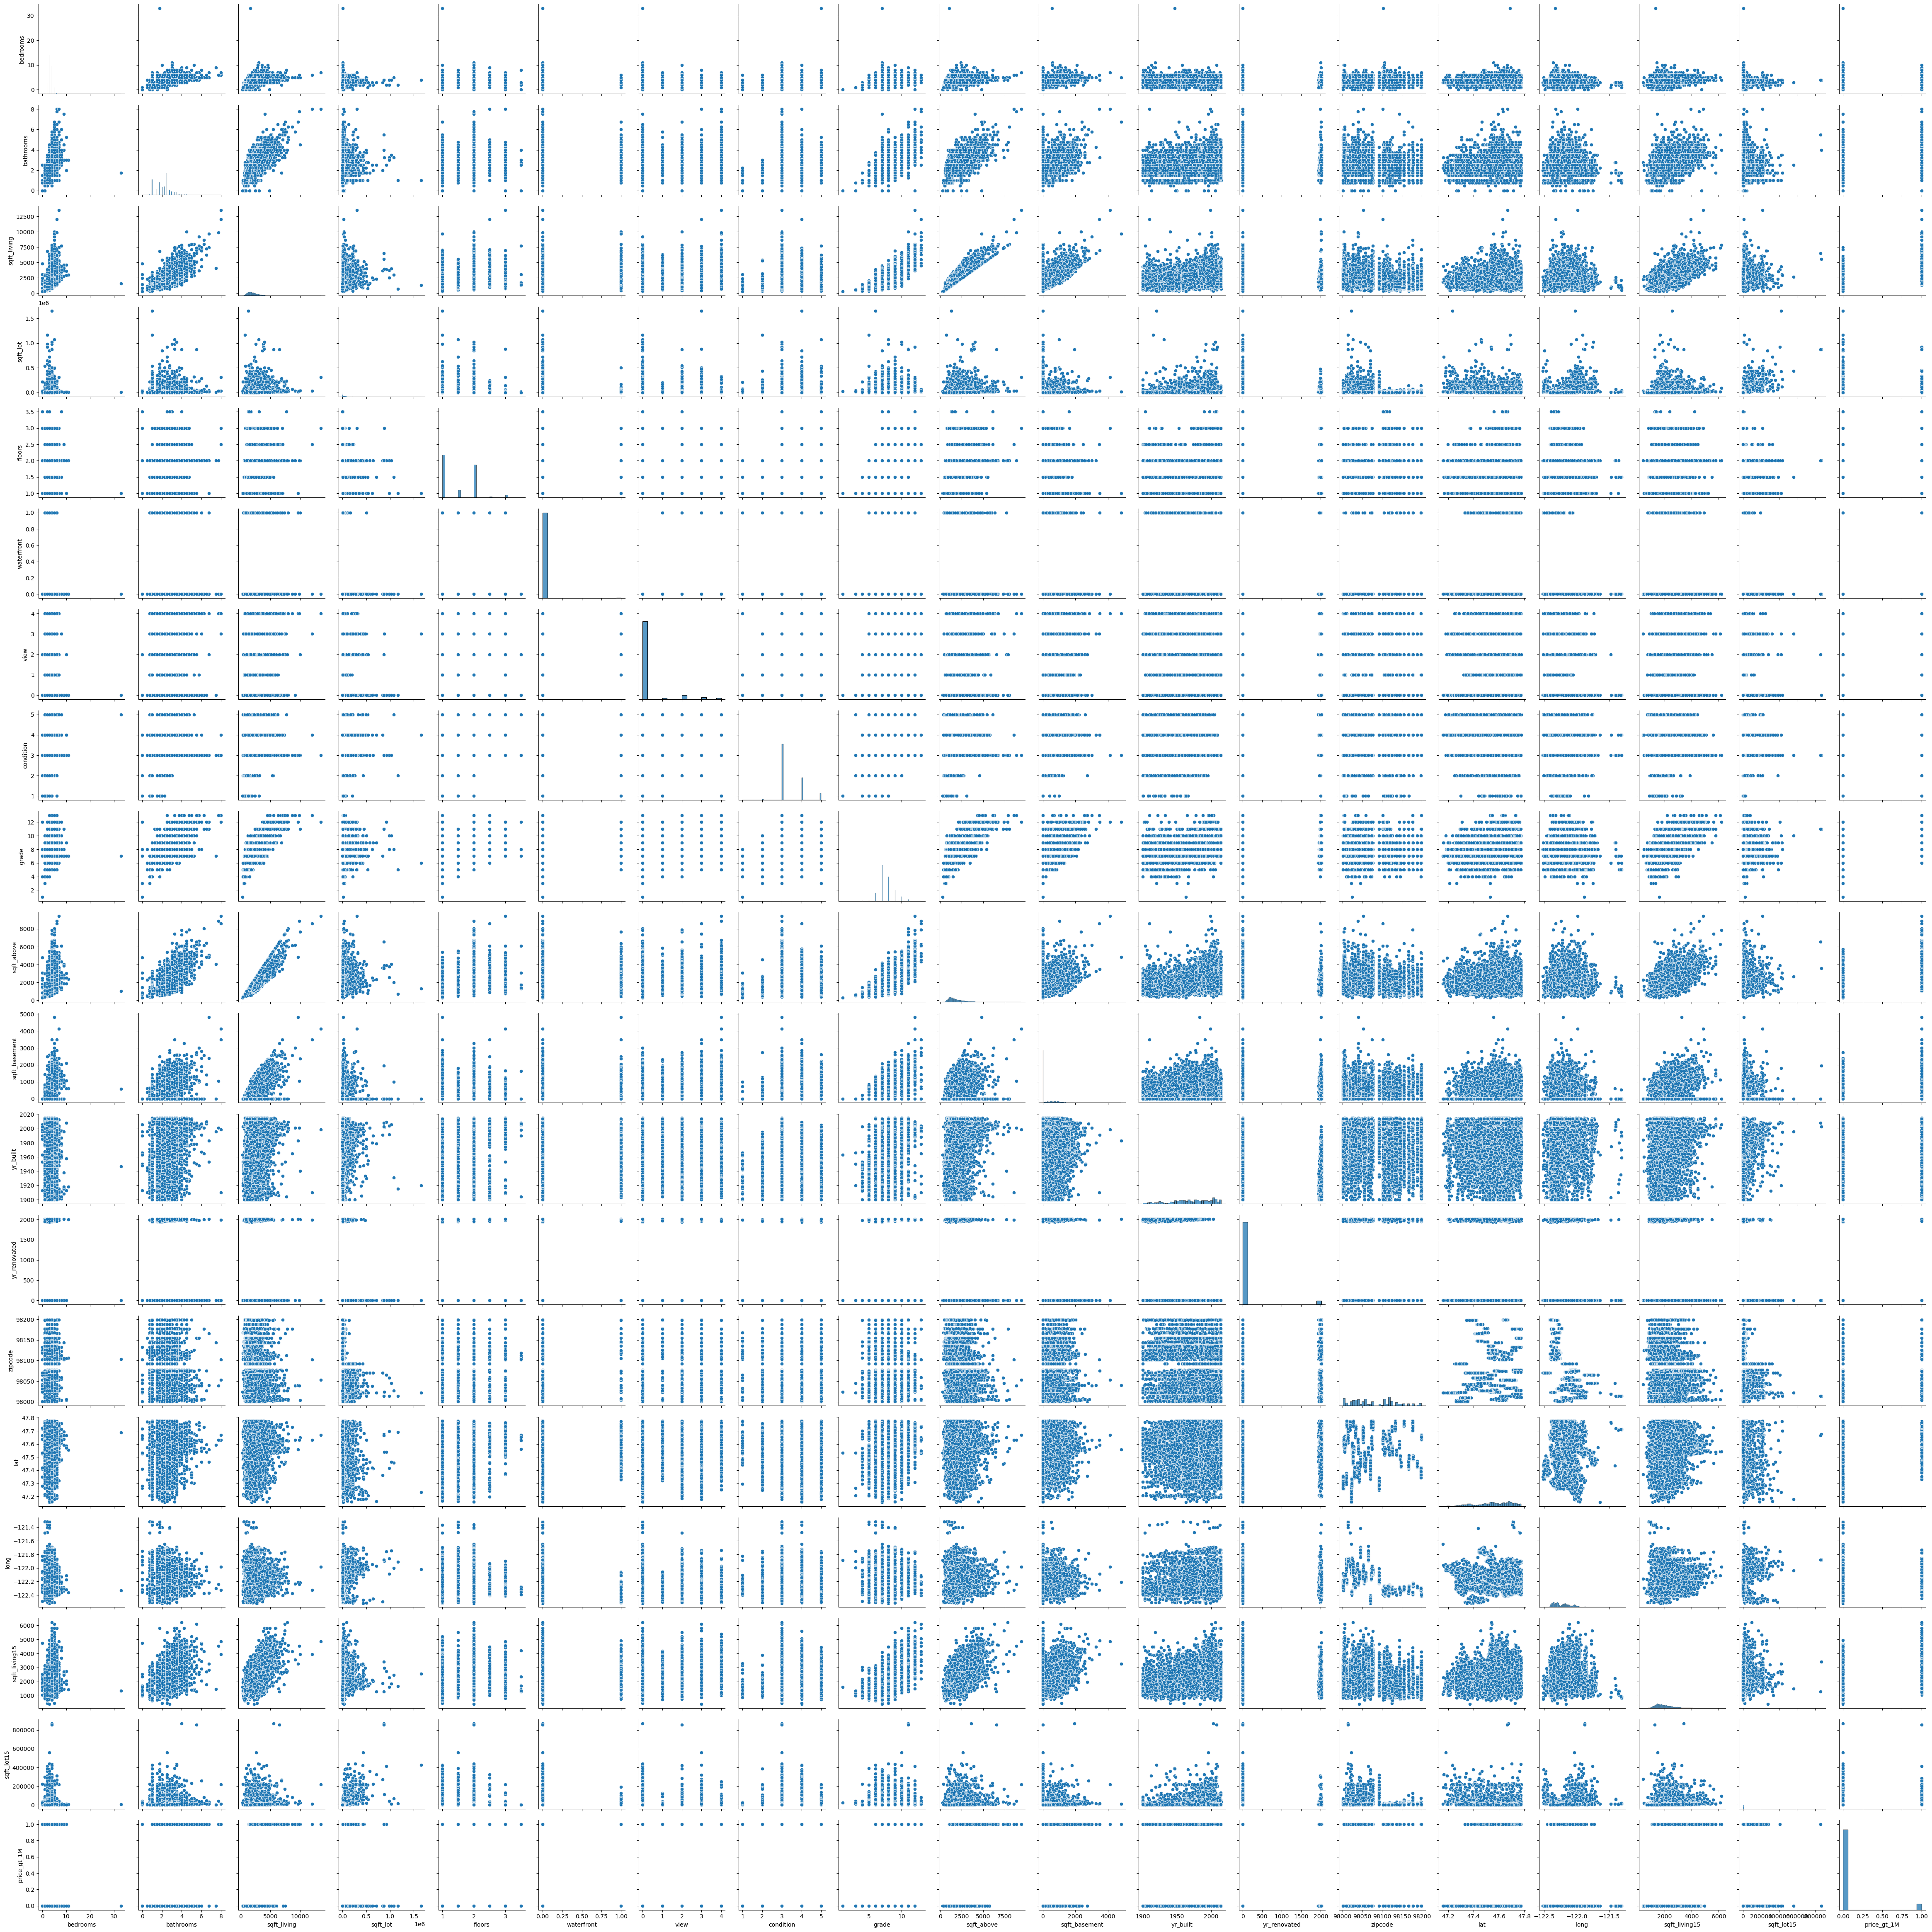

In [139]:
# Pairplot of the features
sns.pairplot(housing_df)
plt.show()

In [141]:
#Task 4: Categorize Feature Types

categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numerical_features = [col for col in housing_df.columns if col not in categorical_features + ['price_gt_1M']]


In [143]:
#Task 4: Train-Test Split

from sklearn.model_selection import train_test_split

X = housing_df.drop(columns=['price_gt_1M'])
y = housing_df['price_gt_1M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)


In [145]:
#Task 4: Logistic Regression Models
#Model 0: Null Model

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Null model
null_model = DummyClassifier(strategy='most_frequent')
null_model.fit(X_train, y_train)

# Predictions
y_train_pred = null_model.predict(X_train)
y_test_pred = null_model.predict(X_test)

# Accuracy scores
print(f'Null model training accuracy: {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Null model test accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

# Confusion matrices
print('Training Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Null model training accuracy: 0.933
Null model test accuracy: 0.924
Training Confusion Matrix:
 [[16127     0]
 [ 1163     0]]
Test Confusion Matrix:
 [[3994    0]
 [ 329    0]]


In [147]:
#Model 1: Ridge Regression with C=1.0

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Ridge regression model
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=2000))
])

ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Accuracy scores
print(f'Ridge Regression training accuracy: {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Ridge Regression test accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

# Confusion matrices
print('Training Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Ridge Regression training accuracy: 0.974
Ridge Regression test accuracy: 0.971
Training Confusion Matrix:
 [[15984   143]
 [  314   849]]
Test Confusion Matrix:
 [[3961   33]
 [  94  235]]


In [149]:
#Model 2: Lasso Regression with C=1.0

# Lasso regression model
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=1.0, penalty='l1', solver='saga', max_iter=2000))
])

lasso_model.fit(X_train, y_train)

# Predictions
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Accuracy scores
print(f'Lasso Regression training accuracy: {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Lasso Regression test accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

# Confusion matrices
print('Training Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Lasso Regression training accuracy: 0.974
Lasso Regression test accuracy: 0.970
Training Confusion Matrix:
 [[15977   150]
 [  296   867]]
Test Confusion Matrix:
 [[3957   37]
 [  92  237]]


In [151]:
#Model 3: Lasso Regression with C=0.01

# Lasso regression model with C=0.01

lasso_model_001 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.01, penalty='l1', solver='saga', max_iter=5000))
])


lasso_model_001.fit(X_train, y_train)

# Predictions
y_train_pred = lasso_model_001.predict(X_train)
y_test_pred = lasso_model_001.predict(X_test)

# Accuracy scores
print(f'Lasso Regression (C=0.01) training accuracy: {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Lasso Regression (C=0.01) test accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

# Confusion matrices
print('Training Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Lasso Regression (C=0.01) training accuracy: 0.954
Lasso Regression (C=0.01) test accuracy: 0.950
Training Confusion Matrix:
 [[16005   122]
 [  670   493]]
Test Confusion Matrix:
 [[3958   36]
 [ 179  150]]


In [156]:
#Model 4: Lasso Regression with Optimal C

from sklearn.linear_model import LogisticRegressionCV

# Lasso regression with cross-validated optimal C
lasso_cv_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='saga', max_iter=5000))
])

lasso_cv_model.fit(X_train, y_train)

# Optimal C
optimal_C = lasso_cv_model.named_steps['classifier'].C_[0]
print(f'Optimal C value: {optimal_C}')

# Predictions
y_train_pred = lasso_cv_model.predict(X_train)
y_test_pred = lasso_cv_model.predict(X_test)

# Accuracy scores
print(f'Lasso Regression CV training accuracy: {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Lasso Regression CV test accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

# Confusion matrices
print('Training Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))


Optimal C value: 21.54434690031882
Lasso Regression CV training accuracy: 0.975
Lasso Regression CV test accuracy: 0.972
Training Confusion Matrix:
 [[15974   153]
 [  287   876]]
Test Confusion Matrix:
 [[3957   37]
 [  85  244]]


Decision Tree training accuracy: 1.000
Decision Tree test accuracy: 0.960
Training Confusion Matrix:
 [[16127     0]
 [    0  1163]]
Test Confusion Matrix:
 [[3901   93]
 [  79  250]]


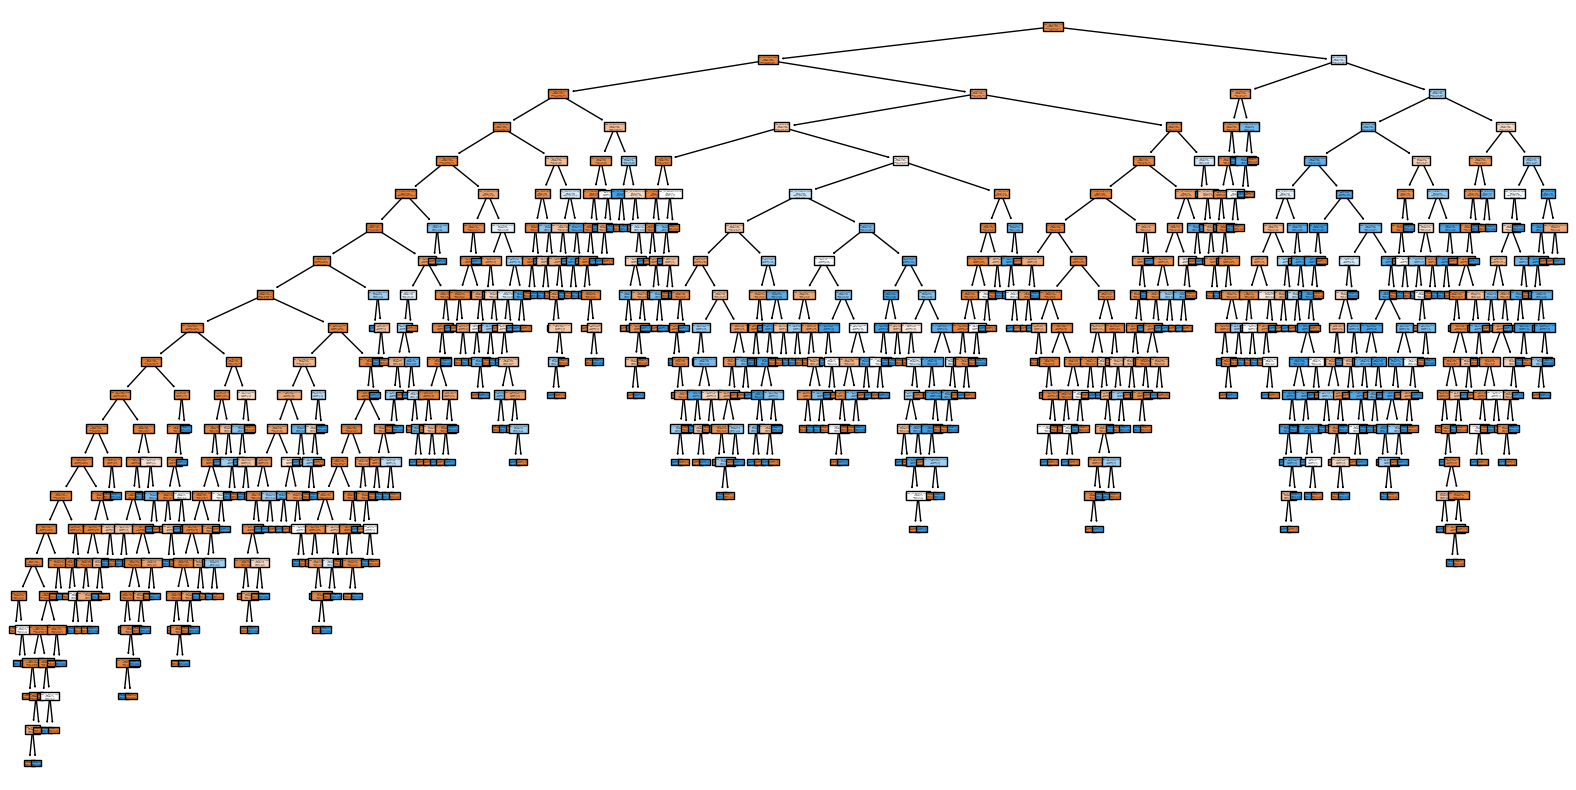

In [158]:
#Task 5: Simple Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming preprocessor is already defined as in the previous steps
# from the provided code context

# Decision tree model
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=73))
])

# Fit the model
tree_model.fit(X_train, y_train)

# Predictions
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Accuracy scores
print(f'Decision Tree training accuracy: {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Decision Tree test accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

# Confusion matrices
print('Training Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))

# Extract feature names after preprocessing
feature_names = tree_model.named_steps['preprocessor'].get_feature_names_out()

# Optional: Display the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model.named_steps['classifier'], feature_names=feature_names, class_names=['<1M', '>=1M'], filled=True)
plt.show()


Training MSE: 0.025795257374204742
Test MSE: 0.029840388619014575
Training R2: 0.5888535437838343
Test R2: 0.5756042878908028
Training Accuracy: 0.9742047426257953
Test Accuracy: 0.9701596113809854


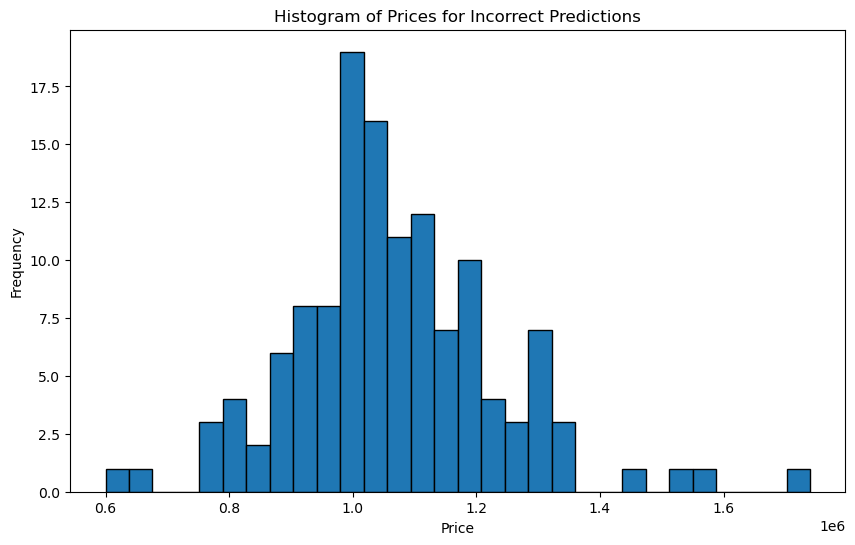

In [160]:
#Task 6: Error Exploration

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

# Load the datasets
classification_df = pd.read_csv('./data/kc_house_data_classification.csv')
regression_df = pd.read_csv('./data/kc_house_data_regression.csv')

# Define features
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numeric_features = [col for col in classification_df.columns if col not in categorical_features + ['price_gt_1M']]

# Split data into training and test sets
X = classification_df.drop(columns='price_gt_1M')
y = classification_df['price_gt_1M']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Model 2: Logistic Regression with L1 penalty
logistic_lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000))
])

# Fit the model
logistic_lasso_model.fit(X_train, y_train)

# Predict on the training set and test set
y_pred_train = logistic_lasso_model.predict(X_train)
y_pred_test = logistic_lasso_model.predict(X_test)

# Calculate and print metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R2:", train_r2)
print("Test R2:", test_r2)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Identify misclassified rows
misclassified_indices = (y_pred_test != y_test)

# Get the indices of the test set
test_indices = X_test.index

# Join the regression dataset with the test set to get actual prices
test_regression_data = regression_df.loc[test_indices]

# Select actual prices of misclassified rows
misclassified_prices = test_regression_data.loc[misclassified_indices, 'price']

# Create a histogram of the actual prices for misclassified rows
plt.figure(figsize=(10, 6))
plt.hist(misclassified_prices, bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices for Incorrect Predictions')
plt.show()


Histogram-based Gradient Boosting training accuracy: 0.996
Histogram-based Gradient Boosting test accuracy: 0.972
Training Confusion Matrix:
 [[16102    25]
 [   47  1116]]
Test Confusion Matrix:
 [[3957   37]
 [  82  247]]


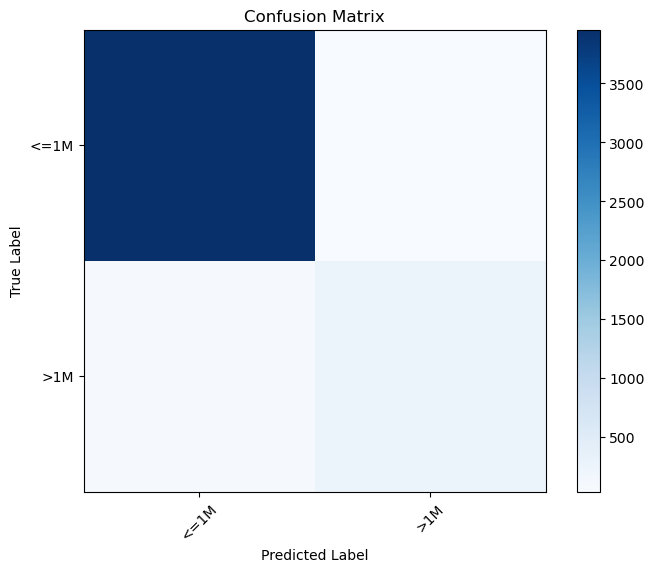

In [162]:
# Histogram-based Gradient Boosting Classifier

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
classification_df = pd.read_csv('./data/kc_house_data_classification.csv')

# Define features and target
categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numeric_features = [col for col in classification_df.columns if col not in categorical_features + ['price_gt_1M']]
X = classification_df.drop(columns='price_gt_1M')
y = classification_df['price_gt_1M']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing to the training and test data
X_train_dense = preprocessor.fit_transform(X_train).toarray()
X_test_dense = preprocessor.transform(X_test).toarray()

# Histogram-based Gradient Boosting model
hgb_model = HistGradientBoostingClassifier(random_state=73)

# Fit the model
hgb_model.fit(X_train_dense, y_train)

# Predictions
y_train_pred = hgb_model.predict(X_train_dense)
y_test_pred = hgb_model.predict(X_test_dense)

# Accuracy scores
print(f'Histogram-based Gradient Boosting training accuracy: {accuracy_score(y_train, y_train_pred):.3f}')
print(f'Histogram-based Gradient Boosting test accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

# Confusion matrices
print('Training Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_test_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['<=1M', '>1M'], rotation=45)
plt.yticks(tick_marks, ['<=1M', '>1M'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()


In [164]:
#Lasso Regression for Price Prediction

from sklearn.linear_model import LassoCV

# Load the dataset
housing_df_reg = pd.read_csv('./data/kc_house_data_regression.csv')

# Define features and target
X = housing_df_reg.drop('price', axis=1)
y = housing_df_reg['price']

# Preprocessing and LassoCV
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ]
)

lasso_cv_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LassoCV(cv=5))
])

lasso_cv_model.fit(X, y)

# Optimal alpha
optimal_alpha = lasso_cv_model.named_steps['regressor'].alpha_
print(f'Optimal alpha value: {optimal_alpha}')

# Predictions
y_pred = lasso_cv_model.predict(X)

# Performance metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')


Optimal alpha value: 257.73019883694803
Mean Squared Error: 40519272883.939865
